In [1]:
! pip install simplification
import warnings
warnings.filterwarnings('ignore')

import ast
import math
import pandas as pd
import glob
import numpy as np

from simplification.cutil import simplify_coords

import matplotlib.pyplot as plt
import matplotlib.style as style

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import ujson as json
import pandas as pd
import numpy as np
from matplotlib import pyplot
import geopandas 
import csv

In [3]:
records = map(json.loads, open('/users/chob/full_simplified_soccer ball.ndjson'))
df = pd.DataFrame.from_records(records)

In [4]:
def make_matrix(d):
    # c_max = 0
    m = np.zeros((256,256), dtype=bool)
    for s in d:
        s_x = np.array(s[0], dtype=int)
        s_y = np.array(s[1], dtype=int)
        # c_max = max(s_x.max(), s_y.max())
        #if s_x.max() < 256 and s_y.max() < 256 and s_x.min() >= 0 and s_y.min() >= 0:
        for x, y in zip(s_x, s_y):
            m[x, y] = 1
    return m

In [5]:
df['matrix'] = df.drawing.apply(lambda d: make_matrix(d))
df['vector'] = df['matrix'].apply(lambda x: x.flatten())

In [6]:
df.to_csv('/users/chob/soccer_ball.csv', index=False)

In [7]:
country_code = 'Country code.csv'
dc = pd.read_csv(country_code)
dc = dc.fillna("No INFO")

In [8]:
merge = pd.merge(df,dc,left_on ='countrycode', right_on ='ISO (2)', how ='outer')
merge=merge.dropna()
merge=merge.sort_values(by='Continent')
merge

,word,countrycode,timestamp,recognized,key_id,drawing,matrix,vector,Continent,Country,ISO (2)
120144,soccer ball,ZA,2017-03-19 10:43:31.77836 UTC,True,6170545781473280,"[[[129, 117, 86, 69, 51, 36, 18, 8, 2, 0, 6, 3...","[[False, False, False, False, False, False, Fa...","[False, False, False, False, False, False, Fal...",Africa,South Africa,ZA
120053,soccer ball,ZA,2017-01-23 11:48:08.81611 UTC,True,5599077418926080,"[[[22, 18, 15, 4, 4, 14, 44, 101, 141, 159, 17...","[[False, False, False, False, False, False, Fa...","[False, False, False, False, False, False, Fal...",Africa,South Africa,ZA
120054,soccer ball,ZA,2017-03-26 19:27:36.04287 UTC,True,5785509580242944,"[[[245, 244, 240, 221, 200, 160, 128, 109, 92,...","[[False, False, False, False, False, False, Fa...","[False, False, False, False, False, False, Fal...",Africa,South Africa,ZA
120055,soccer ball,ZA,2017-01-26 18:58:06.08629 UTC,True,6743253586018304,"[[[220, 197, 154, 119, 103, 88, 57, 20, 5, 0, ...","[[False, False, False, False, False, False, Fa...","[False, False, False, False, False, False, Fal...",Africa,South Africa,ZA
120056,soccer ball,ZA,2017-03-10 15:17:48.03219 UTC,True,5431471315615744,"[[[50, 54, 71, 103, 135, 161, 196, 216, 231, 2...","[[False, False, False, False, False, False, Fa...","[False, False, False, False, False, False, Fal...",Africa,South Africa,ZA
...,...,...,...,...,...,...,...,...,...,...,...
100544,soccer ball,AU,2017-03-29 05:18:58.38643 UTC,True,6175248938434560,"[[[59, 49, 40, 28, 17, 14, 20, 31, 56, 93, 130...","[[False, False, False, False, False, False, Fa...","[False, False, False, False, False, False, Fal...",Oceania,Australia,AU
100545,soccer ball,AU,2017-01-23 21:33:09.31216 UTC,True,4850783889653760,"[[[143, 110, 70, 45, 24, 5, 0, 13, 36, 59, 94,...","[[False, False, False, False, False, False, Fa...","[False, False, False, False, False, False, Fal...",Oceania,Australia,AU
100546,soccer ball,AU,2017-03-27 09:12:11.19184 UTC,True,6132575150014464,"[[[42, 74, 132, 204, 245, 254, 228, 206, 166, ...","[[False, False, False, False, False, False, Fa...","[False, False, False, False, False, False, Fal...",Oceania,Australia,AU
100540,soccer ball,AU,2017-03-17 08:27:42.19728 UTC,True,5759818662936576,"[[[96, 16, 2, 0, 2, 18, 34, 56, 86, 203, 236, ...","[[False, False, False, False, False, False, Fa...","[False, False, False, False, False, False, Fal...",Oceania,Australia,AU


In [9]:
#We need to change the 'Americas' into different continent and the americas into the continent you changed into.
asia=merge[merge['Continent']=='Asia']
#Same thing here change americas and the name of the csv file
asia.to_csv('/users/chob/asia.csv', index=False)
#Name the americas_soccer_ball this into whatever continent you changed into. And use the csv file in the previous line
asia_soccer_ball = pd.read_csv("/users/chob/asia.csv")

In [10]:
# Read 3 classes of datasets
counter = 0
#for csv in all_files:
if counter == 3:
    #change americas_soccer_ball this into whatever continent you changed into in the last kennel
    data = asia_soccer_ball #pd.read_csv(csv, index_col = 'key_id', nrows=10)
    data['word'] = data['word'].replace(' ', '_', regex=True)
    #change americas_soccer_ball this into whatever continent you changed into in the last kennel there are two of them in this line
    asia_soccer_ball = asia_soccer_ball.append(data)
    counter+=1


In [11]:
#change this too!
test_drawings = asia_soccer_ball
words = test_drawings['word'].tolist()

drawings = [ast.literal_eval(pts) for pts in test_drawings.sample(4)['drawing'].values]

test_drawings['drawing'].iloc[0]

arr = test_drawings.drawing.values[0]


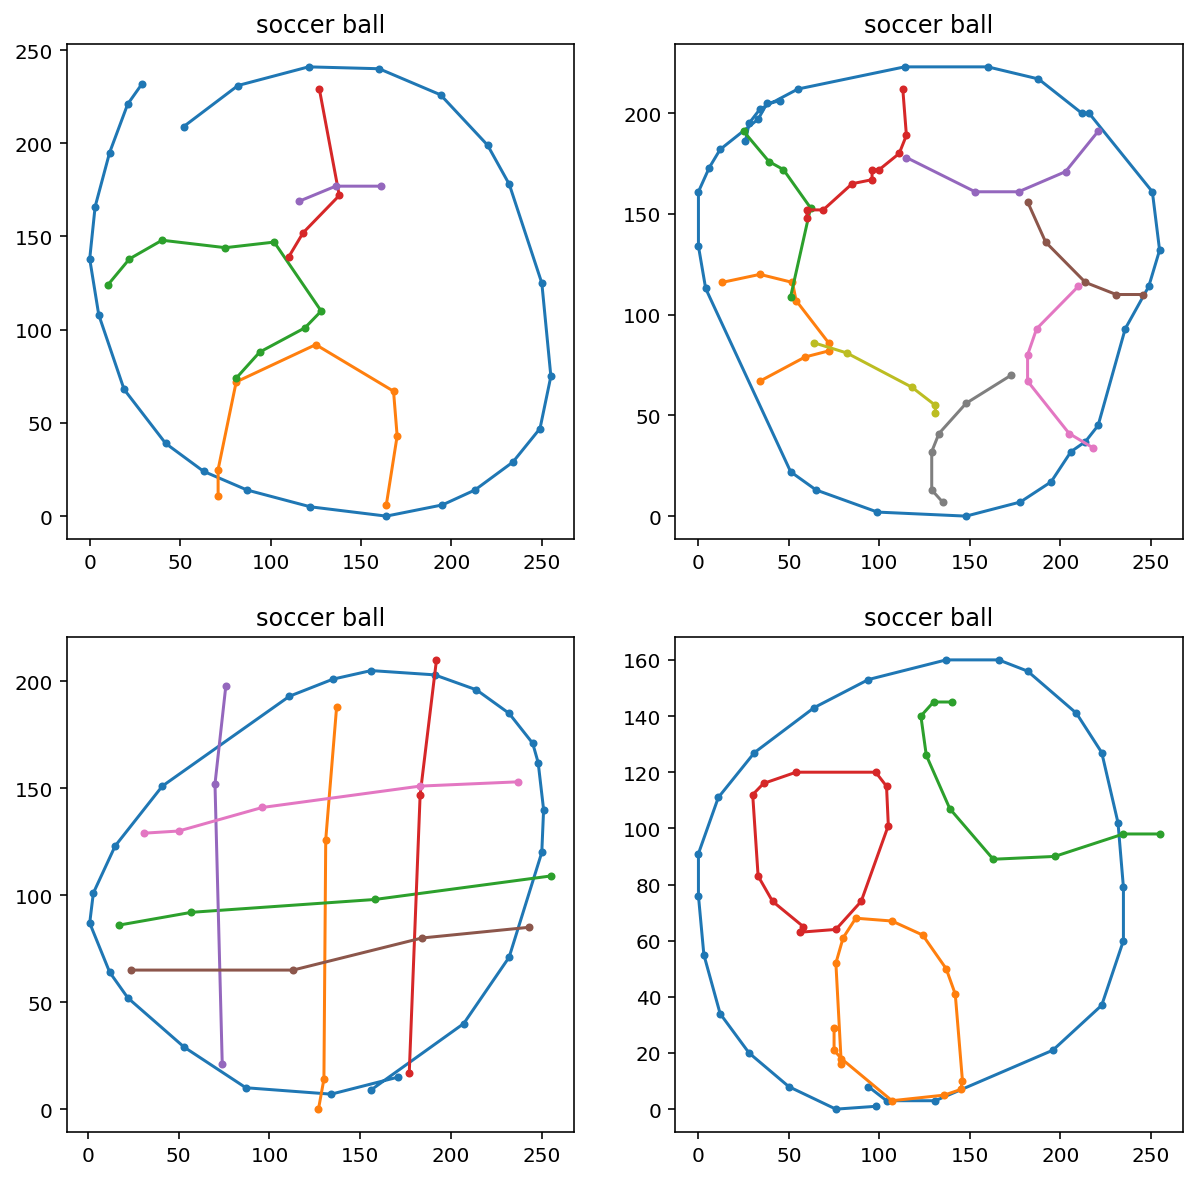

In [12]:
plt.figure(figsize=(10, 10))
for i, drawing in enumerate(drawings):
    plt.subplot(220 + (i+1))
    for x, y in drawing:
        plt.plot(x, y, marker='.')
        plt.title(words[i])

In [13]:
merge['Continent'].value_counts()

Americas    66378
Europe      35179
Asia        18122
Oceania      3512
Africa        854
Name: Continent, dtype: int64

In [14]:
merge['matrix_int'] = merge['matrix'].apply(lambda m: m.astype(np.uintc))

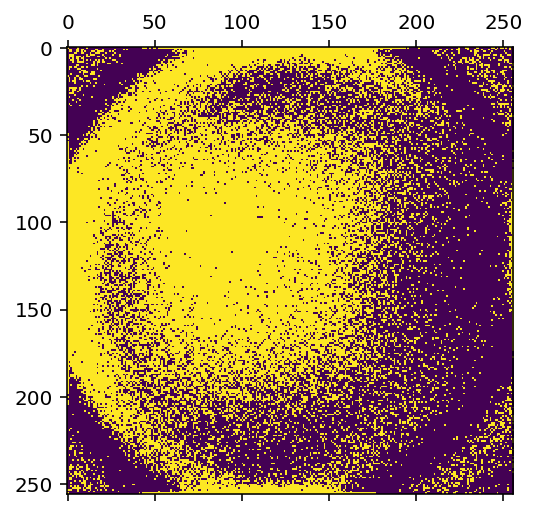

In [15]:
#change these continents to whatever you need to change to
b=merge.groupby('Continent')['matrix_int'].sum()
asia=b['Asia']
asia[(asia<=20)&(asia!=1)]=0
asia[(asia>20)]=1
pic = pyplot.matshow(asia)
pyplot.show()

Text(0, 0.5, 'Continent')

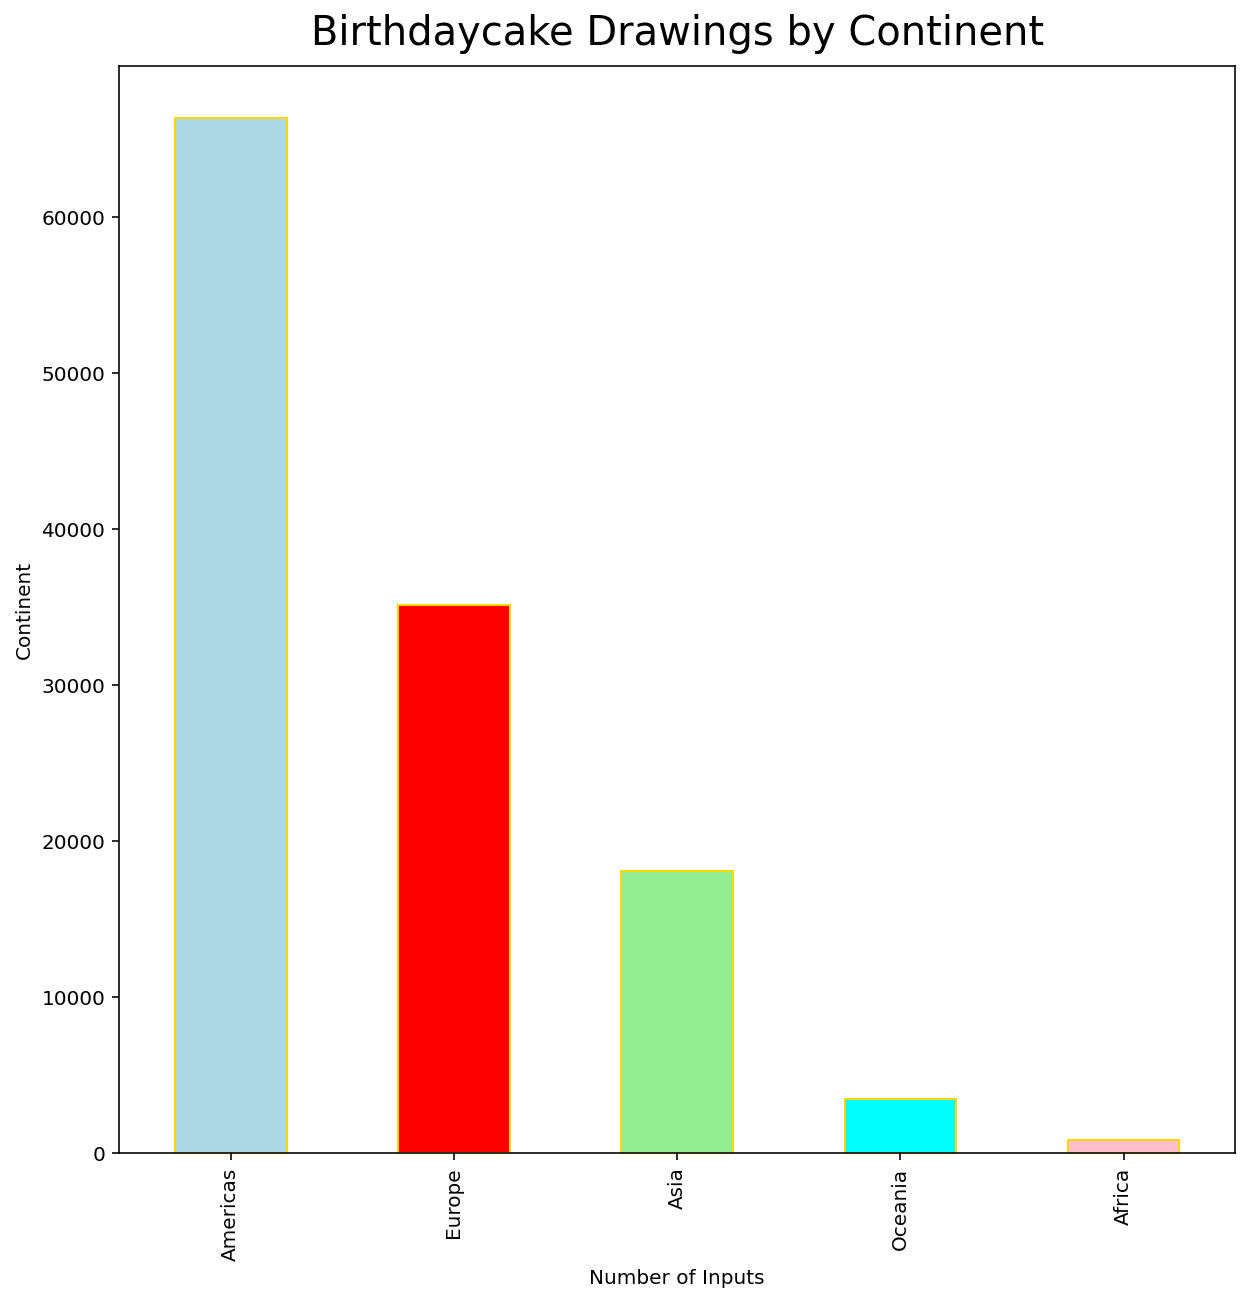

In [16]:
plt = merge['Continent'].value_counts().plot(kind='bar',color=['lightblue', 'red', 'lightgreen', 'cyan', 'pink'],edgecolor='gold',figsize=(10,10))
plt.set_title("Birthdaycake Drawings by Continent", fontsize=20, verticalalignment='bottom')
plt.set_xlabel("Number of Inputs")
plt.set_ylabel("Continent")
